In [216]:
# import packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import calendar
%matplotlib inline

In [186]:
#PLOT: mv accidents vs. month (by year, by borough)

In [2]:
# download NYPD Motor Vehicle Collisions from NYC open data 
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD > mv_accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  289M    0  289M    0     0  2436k      0 --:--:--  0:02:01 --:--:-- 2374k


In [3]:
!mv mv_accidents.csv $PUIDATA

In [187]:
mv = pd.read_csv(os.getenv("PUIDATA") + "/mv_accidents.csv")
mv.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2018,0:00,BROOKLYN,11214,40.590390,-73.991550,"(40.59039, -73.99155)",26 AVENUE,CROPSEY AVENUE,NaN,...,NaN,NaN,NaN,NaN,4004212,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,10/21/2018,0:00,BROOKLYN,11214,40.598310,-73.989160,"(40.59831, -73.98916)",NaN,NaN,17 BAY 37 STREET,...,Unspecified,Unspecified,NaN,NaN,4005400,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
2,10/21/2018,0:00,QUEENS,11368,NaN,NaN,NaN,NORTHERN BOULEVARD,126 STREET,NaN,...,NaN,NaN,NaN,NaN,4004825,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,10/21/2018,0:00,QUEENS,11436,40.668570,-73.798355,"(40.66857, -73.798355)",134 AVENUE,140 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4006007,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
4,10/21/2018,0:00,NaN,NaN,40.750294,-73.994850,"(40.750294, -73.99485)",8 AVENUE,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4005666,Taxi,Taxi,NaN,NaN,NaN


In [188]:
# convert date to a datetime object 
mv['date'] = mv['DATE'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
mv.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date
0,10/21/2018,0:00,BROOKLYN,11214,40.590390,-73.991550,"(40.59039, -73.99155)",26 AVENUE,CROPSEY AVENUE,NaN,...,NaN,NaN,NaN,4004212,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2018-10-21
1,10/21/2018,0:00,BROOKLYN,11214,40.598310,-73.989160,"(40.59831, -73.98916)",NaN,NaN,17 BAY 37 STREET,...,Unspecified,NaN,NaN,4005400,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,2018-10-21
2,10/21/2018,0:00,QUEENS,11368,NaN,NaN,NaN,NORTHERN BOULEVARD,126 STREET,NaN,...,NaN,NaN,NaN,4004825,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2018-10-21
3,10/21/2018,0:00,QUEENS,11436,40.668570,-73.798355,"(40.66857, -73.798355)",134 AVENUE,140 STREET,NaN,...,NaN,NaN,NaN,4006007,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-10-21
4,10/21/2018,0:00,NaN,NaN,40.750294,-73.994850,"(40.750294, -73.99485)",8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,4005666,Taxi,Taxi,NaN,NaN,NaN,2018-10-21


In [189]:
mv.shape

(1369055, 30)

In [190]:
# drop columns we don't need 
mv.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'date'],
      dtype='object')

In [191]:
mv_s = mv[['BOROUGH', 'UNIQUE KEY', 'date']]
mv_s = mv_s.rename(columns={'BOROUGH':'bor', 'UNIQUE KEY':'id'})
mv_s.head()

,bor,id,date
0,BROOKLYN,4004212,2018-10-21
1,BROOKLYN,4005400,2018-10-21
2,QUEENS,4004825,2018-10-21
3,QUEENS,4006007,2018-10-21
4,NaN,4005666,2018-10-21


In [192]:
mv_s.isnull().sum()

bor     400765
id           0
date         0
dtype: int64

In [193]:
# drop na values 
mv_s.dropna(inplace=True)

In [194]:
# extract month and year 
mv_s['month'] = mv_s.date.apply(lambda x: x.month)
mv_s['year'] = mv_s.date.apply(lambda x: x.year)
mv_s.head()

,bor,id,date,month,year
0,BROOKLYN,4004212,2018-10-21,10,2018
1,BROOKLYN,4005400,2018-10-21,10,2018
2,QUEENS,4004825,2018-10-21,10,2018
3,QUEENS,4006007,2018-10-21,10,2018
5,BROOKLYN,4004904,2018-10-21,10,2018


In [195]:
mv_s.date.min()

Timestamp('2012-07-01 00:00:00')

In [196]:
mv_s.date.max()

Timestamp('2018-10-21 00:00:00')

In [197]:
# extract data for 1/1/2013 - 12/31/2017 
mv4 = mv_s[(mv_s['date'] >= '2013-01-01 00:00:00') & (mv_s['date'] < '2018-01-01 00:00:00')]

In [198]:
mv4.shape

(772208, 5)

In [199]:
mv4.bor.unique()

array(['BRONX', 'MANHATTAN', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND'], dtype=object)

In [200]:
# subsample for testing
samp = mv4[::1000]
samp.shape

(773, 5)

In [201]:
# get total accidents by borough by month over the last 5 years 
bor_my_grp = mv4.groupby(['bor', 'month', 'year'])['id'].count()
bor_my_grp

bor            month  year
BRONX          1      2013    1486
                      2014    1635
                      2015    1704
                      2016    1878
                      2017    1680
               2      2013    1542
                      2014    1688
                      2015    1435
                      2016    1644
                      2017    1601
               3      2013    1746
                      2014    1562
                      2015    1825
                      2016    1838
                      2017    1888
               4      2013    1602
                      2014    1530
                      2015    1623
                      2016    1965
                      2017    1737
               5      2013    1808
                      2014    1686
                      2015    1839
                      2016    2010
                      2017    2012
               6      2013    1748
                      2014    1748
                      2015  

In [208]:
# separate by borough
bx = mv4[mv4['bor'] == 'BRONX']
mn = mv4[mv4['bor'] == 'MANHATTAN']
bk = mv4[mv4['bor'] == 'BROOKLYN']
si = mv4[mv4['bor'] == 'STATEN ISLAND']
qu = mv4[mv4['bor'] == 'QUEENS']

In [203]:
samp.head()

,bor,id,date,month,year
183819,BRONX,3820806,2017-12-31,12,2017
185382,STATEN ISLAND,3818816,2017-12-29,12,2017
186934,BROOKLYN,3816887,2017-12-26,12,2017
188502,QUEENS,3814849,2017-12-23,12,2017
190079,QUEENS,3813371,2017-12-20,12,2017


In [209]:
counts_bx = samp.date[samp.bor=='BRONX'].groupby([samp.date.dt.month]).count()
counts_bx

date
1     11
2     11
3     10
4     14
5     14
6      5
7      8
8      9
9     13
10     2
11    10
12     9
Name: date, dtype: int64

In [205]:
samp.date[samp.bor=='BRONX'].groupby([samp.date.dt.month])

In [210]:
# get the counts of accidents by each borough and each month 
counts_bx = mv4.date[mv4.bor=='BRONX'].groupby([mv4.date.dt.month]).count()
counts_bk = mv4.date[mv4.bor=='BROOKLYN'].groupby([mv4.date.dt.month]).count()
counts_mn = mv4.date[mv4.bor=='MANHATTAN'].groupby([mv4.date.dt.month]).count()
counts_si = mv4.date[mv4.bor=='STATEN ISLAND'].groupby([mv4.date.dt.month]).count()
counts_qu = mv4.date[mv4.bor=='QUEENS'].groupby([mv4.date.dt.month]).count()

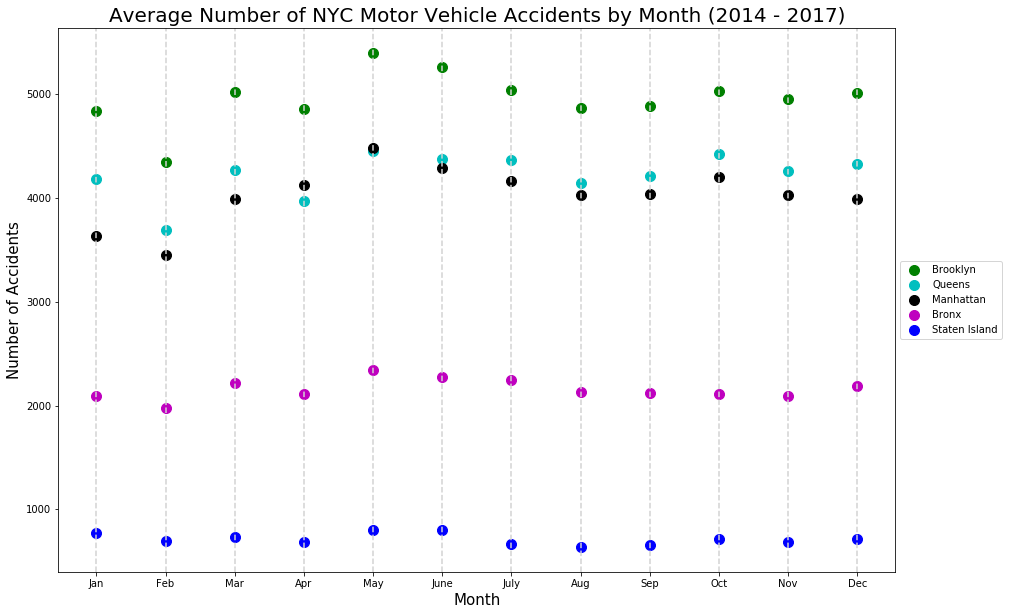

In [217]:
# plot num accidents in each borough by month 
fig = plt.figure(figsize=(15,10))
plt.plot(np.sort(mv4.date.dt.month.unique()), (counts_bk / 4), 'go', label='Brooklyn', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (counts_qu / 4), 'co', label='Queens', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (counts_mn / 4), 'ko', label='Manhattan', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (counts_bx / 4), 'mo', label='Bronx', markersize=10)
plt.plot(np.sort(mv4.date.dt.month.unique()), (counts_si / 4), 'bo', label='Staten Island', markersize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
xposition = np.sort(mv4.date.dt.month.unique())
plt.xticks(np.sort(mv4.date.dt.month.unique()), ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'))
for xc in xposition:
    plt.axvline(x=xc, color='lightgray', linestyle='--')
plt.title ("Average Number of NYC Motor Vehicle Accidents by Month (2014 - 2017)", fontsize=20)
plt.ylabel ("Number of Accidents", fontsize=15)
plt.xlabel ("Month", fontsize=15)
plt.show()

Figure 1: The plot above shows average number of motor vehicle accidents by month and borough in NYC for 2014 - 2017. We see that Brooklyn has the highest average number of accidents in every month and Staten Island has the lowest average number of accidents in every month. Average number of accidents is relatively similar throughout the entire year in the Bronx and Staten Island. There is more variability in the number of accidents per month throughout the year in Brooklyn, Queens, and Manhattan. In Brooklyn, Queens, and Manhattan, the highest average number of accidents is in May. 